# Vocal Resonance and its Physical Representation 

共鸣 vocal resonance
特定音高/腔体闭合
音高与腔体的频率相和达到放大音量的效果
1.-胸腔共鸣(低音区)
2.口腔，吼腔，支气管-(中音区)
3.额头，鼻腔周边-»头 腔共鸣(高音区)


以下代码中的test用audio
1.专业带resonance的demo(低音到高音共鸣变化,2:24-2:30)https://www.youtube.com/watch?v=LvuxO1mduS0
2.(1:30-1:41鼻腔;1:47-1:52鼻腔头腔;1:58-2:01,2:03-2:05;民歌:鼻腔单独:2:18-2:21;2:26-2:35;美声:三腔共通:2:29-3:09)
https://www.youtube.com/watch?v=O1AZSAXQEzs

# feature selection
formants are the resonance frequency of the vocal tract
every resonating cavity resonate at its own frequency
first(pharynx) and second(oral cavity) formants are the "vowel formants" most relatable to human speeach
harmonics(the 1st is the fundamental frequency-pitch)
(overtones exlusive of f0)
vocal formants+harmonics+overtones--->vocal resonance(to increases richness in voice)

compare and check the harmonics and fromant structure chnages
how to reach vocal resonance?（vowel checking，which vowel it is，the other formant is for other things）
reshape the voca tract-->lchange the frequency of the resonator-->lower or raise vowel formants
-->align with one or more of the frequency of the harmonics-->create louder,richer sound

how to tune resonance?(F1,F2 formants--where the sound is produced in mouth
pitch changes,other harmonics also change--->to resonate__>change the vocal resonator

# overall testing methodlogy
1. Resonance on different note/phonem,to prove: co-relation btw resonance and certain features
2. Based on same note show MFCC graph/formant structure/harmonics of diff resonance type
3. MFCC sectioned/ formants/harmonics then feed to GMM and evaluate effects
4. If doesnt work,try (A)change parameter,such as window sizes, dataset and so on;(B) data augmentation;(C)still doesnt work try other model like KNN,SVM,HMM

5. (*)see if the resonance effect of one audio can be multiplied onto another audio file

In [5]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
import librosa
import numpy

%matplotlib inline

In [41]:
fpath=r"C:\Users\gaoyu\OneDrive\Documents\Sound recordings\Recording.wav"

In [11]:
import os
import argparse
from pydub import AudioSegment

formats_to_convert = ['.m4a']

def trans_to_wav(dirpath):
    for (dirpath, dirnames, filenames) in os.walk(dirpath):
        for filename in filenames:
            if filename.endswith(tuple(formats_to_convert)):

                filepath = dirpath + '/' + filename
                (path, file_extension) = os.path.splitext(filepath)
                file_extension_final = file_extension.replace('.', '')
                try:
                    track = AudioSegment.from_file(filepath,
                            file_extension_final)
                    wav_filename = filename.replace(file_extension_final, 'wav')
                    wav_path = dirpath + '/' + wav_filename
                    print('CONVERTING: ' + str(filepath))
                    file_handle = track.export(wav_path, format='wav')
                    os.remove(filepath)
                except:
                    print("ERROR CONVERTING " + str(filepath))
dirpath=r"C:\Users\gaoyu\OneDrive\Documents\Sound recordings"
trans_to_wav(dirpath)

CONVERTING: C:\Users\gaoyu\OneDrive\Documents\Sound recordings/Recording.m4a


In [6]:
import IPython.display as ipd
#ipd.Audio(r'C:\Users\gaoyu\OneDrive\Documents\Sound recordings\Recording.wav')

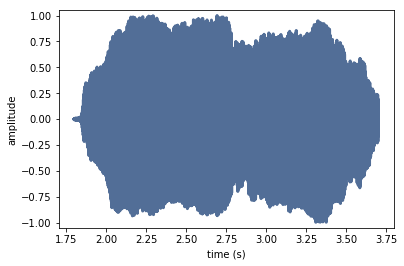

In [30]:
# load a local WAV file
response = thinkdsp.read_wave(r'C:\Users\gaoyu\OneDrive\Documents\Sound recordings\Recording.wav')
start = 1.8
response = response.segment(start=start,duration=1.9)

response.normalize()
response.plot()
thinkplot.config(xlabel='time (s)', 
                 ylabel='amplitude', 
                 ylim=[-1.05, 1.05], 
                 legend=False)


In [5]:
#response.make_audio()

[(7231.330154716731, 878.4210526315788),
 (5864.51772321289, 880.5263157894736),
 (5793.41028768204, 877.3684210526316),
 (5185.306772660975, 886.3157894736842),
 (5092.011702268385, 293.1578947368421)]

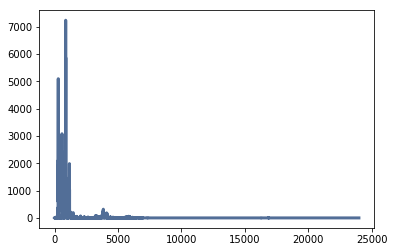

In [35]:
spectrum = response.make_spectrum()
spectrum.plot()
spectrum.peaks()[:5]

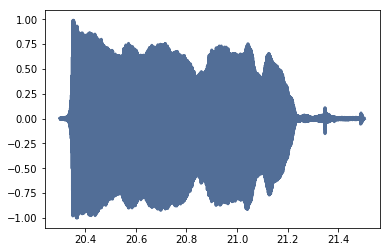

In [53]:
# load a local WAV file
response2 = thinkdsp.read_wave(r'C:\Users\gaoyu\OneDrive\Documents\Sound recordings\Recording.wav')
start = 20.3
response2 = response2.segment(start=start,duration=21)
response2.normalize()
response2.plot()

In [4]:
#response2.make_audio()

[(4762.949374944178, 741.6943521594684),
 (4662.425483394225, 746.6777408637873),
 (4463.7661775754905, 747.5083056478405),
 (4408.457623593939, 740.0332225913621),
 (4069.0912582864917, 740.8637873754153)]

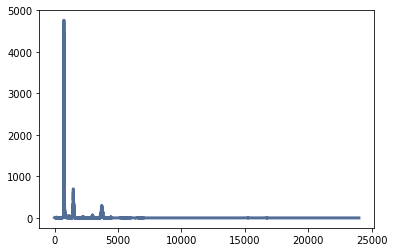

In [56]:
spectrum = response2.make_spectrum()
spectrum.plot()
spectrum.peaks()[:5]

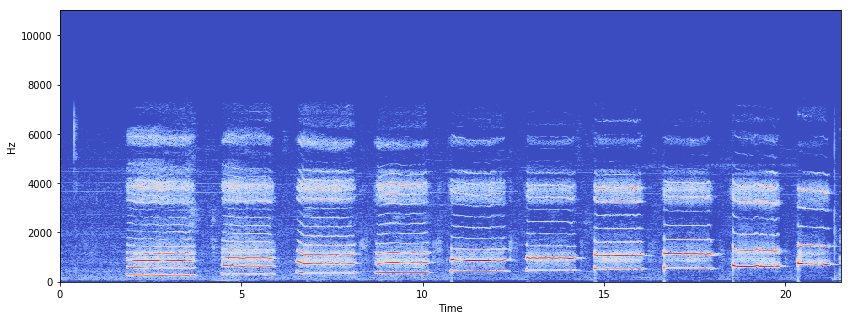

In [43]:
import matplotlib.pyplot as plt
import librosa.display
x, sr = librosa.load(fpath, res_type="kaiser_fast")
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

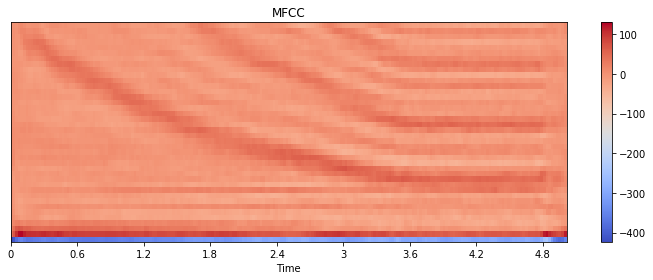

In [95]:
mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [94]:
#pitches=librosa.core.piptrack(x)

In [72]:
path2=r"C:\Users\gaoyu\Desktop\共鸣"
trans_to_wav(path2)


CONVERTING: C:\Users\gaoyu\Desktop\共鸣/teach.m4a


In [3]:
path2=r"C:\Users\gaoyu\Desktop\共鸣\teach.wav"
#ipd.Audio(path2)

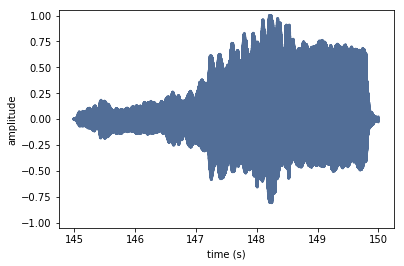

In [83]:
demo = thinkdsp.read_wave(path2)
start = 145
demo = demo.segment(start=start,duration=5)
demo.normalize()
demo.plot()
thinkplot.config(xlabel='time (s)', 
                 ylabel='amplitude', 
                 ylim=[-1.05, 1.05], 
                 legend=False)

In [2]:
#demo

In [91]:
#trim audio and save
import numpy
import math
import scipy.io.wavfile
from pydub import AudioSegment
#time in ms
sound = AudioSegment.from_file(path2)
print(sound)
demo = sound[145000:150000]
demo.export("demo.wav", format="wav")

<_io.BufferedRandom name='demo.wav'>

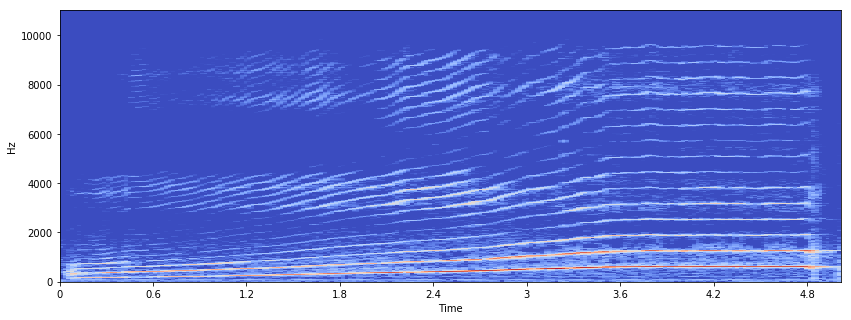

In [92]:
path2=r"C:\Users\gaoyu\Desktop\try\Gaussian_Mixture_Models-master\demo.wav"
x, sr = librosa.load(path2, res_type="kaiser_fast")
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

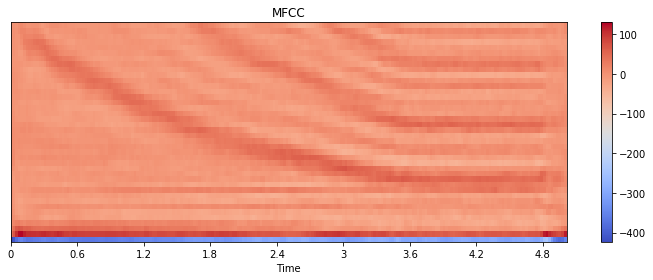

In [93]:
mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

# Resonance effect adding trial

44100 48000


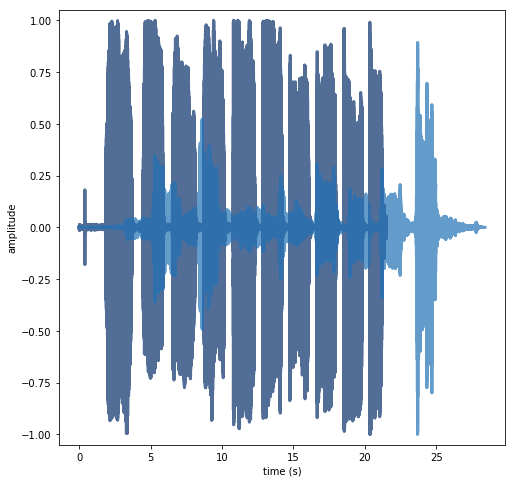

In [139]:
demo= thinkdsp.read_wave(path2)
print(demo)
response = thinkdsp.read_wave(r'C:\Users\gaoyu\OneDrive\Documents\Sound recordings\Recording.wav')
print(demo.framerate,response.framerate)
response.framerate=44100
output = response.convolve(demo)
output.normalize()
response.plot(label='original')
output.plot(label='convolved')
thinkplot.config(xlabel='time (s)', ylabel='amplitude', ylim=[-1.05, 1.05])

In [1]:
#output.make_audio()

# 可能的应用场景：
调音共鸣 k歌同一首歌的翻唱数据量大的时候可以用，高分为好声音，低分为原始声音，模型如何计算来使声音由原始声音调成好声音。（AI歌手/现场，AI老师，用户买单，百万调音师）（1.节奏切到点上 2.音高调整 3.未实现：共鸣的实现提高音质）e.g--》自己编曲录音，修音出专辑

付费的一键调音
变声器 搞笑短音频